In [3]:
import pandas as  pd

In [32]:
scode= pd.read_csv("/home/prasun/Downloads/percent_black_in_2018.csv")
mcode = pd.read_csv("/home/prasun/Downloads/US_violent_crime.csv")

In [33]:
scode.head()

,State,State Code,Percent Black
0,Alaska,AK,3.8
1,Alabama,AL,26.8
2,Arkansas,AR,15.7
3,American Samoa,AS,0.0
4,Arizona,AZ,5.1


In [35]:
mcode.head(2)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [42]:
ppl.columns

Index(['State', 'Lit_A', 'POP_EST'], dtype='object')

In [43]:
ppl = pd.read_csv("/home/prasun/Downloads/archive/LITERACY_AND_POP_V2.csv")
ppl.columns = ["State","Literate","Population"]
ppl.head()

,State,Literate,Population
0,New Hampshire,278.9,1348787
1,Minnesota,278.8,5566230
2,Alaska,276.7,739700
3,District of Columbia,276.7,694906
4,Vermont,276.7,624344


### Dataframe Inner-Join

In [44]:
final = pd.merge( mcode,scode, how="inner", on= "State")
final.head()

,State,Murder,Assault,UrbanPop,Rape,State Code,Percent Black
0,Alabama,13.2,236,58,21.2,AL,26.8
1,Alaska,10.0,263,48,44.5,AK,3.8
2,Arizona,8.1,294,80,31.0,AZ,5.1
3,Arkansas,8.8,190,50,19.5,AR,15.7
4,California,9.0,276,91,40.6,CA,6.5


In [45]:
state = pd.merge(final,ppl,how= "inner", on= "State")
state.head()

,State,Murder,Assault,UrbanPop,Rape,State Code,Percent Black,Literate,Population
0,Alabama,13.2,236,58,21.2,AL,26.8,258.9,4874486
1,Alaska,10.0,263,48,44.5,AK,3.8,276.7,739700
2,Arizona,8.1,294,80,31.0,AZ,5.1,262.4,7044008
3,Arkansas,8.8,190,50,19.5,AR,15.7,258.7,3001345
4,California,9.0,276,91,40.6,CA,6.5,257.2,39358497


In [46]:
state.Population.mean()

6485812.66

In [47]:
state.Population.median()

4561414.0

## Robust Measures of Location

### Trimmed Mean

In [48]:
import numpy as np
from scipy import stats
stats.trim_mean(state.Population, 0.10)

4993131.3

### Weighted Mean

In [51]:
import numpy as np
np.average(state["Murder"],weights= state.Population )

9.631572770712745

### Weighted Median

In [53]:
import wquantiles as wq
wq.median(state["Murder"],weights= state.Population)

9.330869826171718

## Estimates of variablity

In [54]:
# Standard Deviation
state.Population.std()

7316961.233267437

In [55]:
# Interquartile Range
state.Population.quantile(0.75) - state.Population.quantile(0.25)

5486783.75

### Robust Measure of Dispersion

In [56]:
# Median Deviation about Median
from scipy import stats as st
st.median_abs_deviation(state['Population'])

2794054.5

## Visualization

### Exploring Data Distribution

In [57]:
# Percentile for Tail Summerization
state['Murder'].quantile([0.05,0.25,0.50,0.75,0.95])

0.05     2.145
0.25     4.075
0.50     7.250
0.75    11.250
0.95    15.400
Name: Murder, dtype: float64

In [58]:
state['Murder'].describe()

count    50.00000
mean      7.78800
std       4.35551
min       0.80000
25%       4.07500
50%       7.25000
75%      11.25000
max      17.40000
Name: Murder, dtype: float64

Text(0, 0.5, 'Population(millions)')

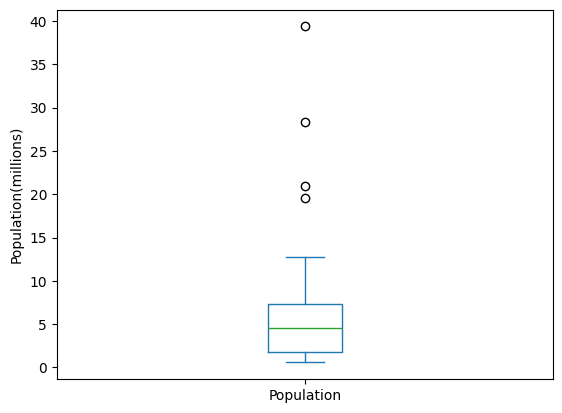

In [60]:
#Boxplot
ax = (state.Population/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')

### Frequency Table and Histogram

In [64]:
#cut() method
popseg = pd.cut(state.Population,10)
print(type(popseg.value_counts()))
popseg.value_counts()

<class 'pandas.core.series.Series'>


Population
(540151.434, 4456887.6]     25
(4456887.6, 8334844.2]      13
(8334844.2, 12212800.8]      6
(12212800.8, 16090757.4]     2
(16090757.4, 19968714.0]     1
(19968714.0, 23846670.6]     1
(27724627.2, 31602583.8]     1
(35480540.4, 39358497.0]     1
(23846670.6, 27724627.2]     0
(31602583.8, 35480540.4]     0
Name: count, dtype: int64

In [82]:
#State Having Maximum and Minimum Population

print("Max:\n")
print(state.loc[state.Population == state.Population.max()][["State","Population"]])
print("\nMin:\n")
print(state.loc[state.Population == state.Population.min()][["State","Population"]])


Max:

        State  Population
4  California    39358497

Min:

      State  Population
49  Wyoming      578931


### Histogram

Text(0.5, 0, 'Population(in Millions)')

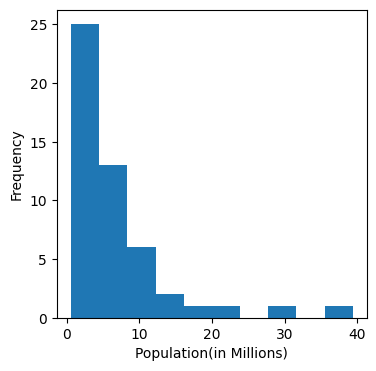

In [89]:
# Pandas Method to plot Histogram
ax =(state.Population/1_000_000).plot.hist(figsize=(4,4), bins= 10)
ax.set_xlabel("Population(in Millions)")